In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/guest/Документы/medstats/src/cxs')

import regressions as rgr

# https://dasha.ai/en-us/blog/auc-roc
# https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand
# https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9

In [2]:
x = np.array([1,3,3,4,5,5,6,8,9,9])
y = np.array([0,0,0,0,1,1,1,0,1,1])



In [15]:
for i in [9,8,6,5,4,3,1]:

    tn, fp, fn, tp = confusion_matrix(y, x>=i).ravel()
    (tn, fp, fn, tp)

    print(i)
    print(fp/(fp + tn))
    print(tp/(tp + fn))
    print(tp/(tp + fn) - fp/(fp + tn))

9
0.0
0.4
0.4
8
0.2
0.4
0.2
6
0.2
0.6
0.39999999999999997
5
0.2
1.0
0.8
4
0.4
1.0
0.6
3
0.8
1.0
0.19999999999999996
1
1.0
1.0
0.0


In [29]:
roc_auc_score(y, x)

0.88

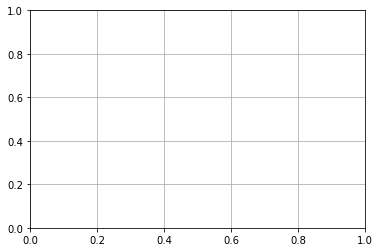

In [4]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plt.grid()
plt.show()

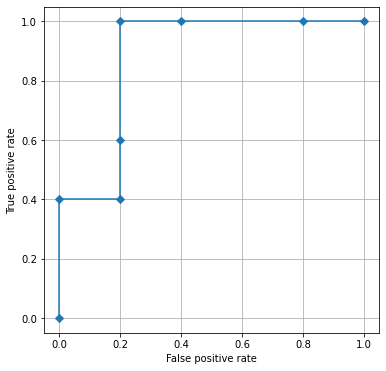

In [207]:
a = np.array([0. , 0. , 0.2, 0.2, 0.2, 0.4, 0.8, 1. ])
b = np.array([0. , 0.4, 0.4, 0.6, 1. , 1. , 1. , 1. ])

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plt.plot(a,b, marker='D')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

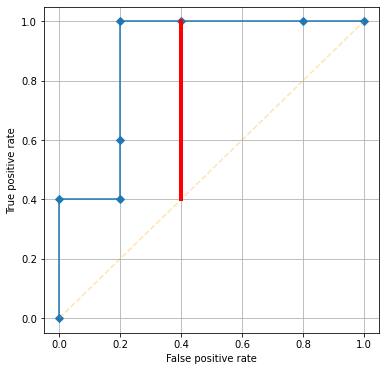

In [251]:
a = np.array([0. , 0. , 0.2, 0.2, 0.2, 0.4, 0.8, 1. ])
b = np.array([0. , 0.4, 0.4, 0.6, 1. , 1. , 1. , 1. ])
j = b-a

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plt.plot(a,b, marker='D')
plt.plot([0,1],[0,1], linestyle='dashed', c='orange', alpha = 0.3)

""" for i in range(len(a)):
    try:
        #plt.axvline(x=a[i],ymin=a[i],ymax=b[i], c='green')
        plt.plot([a[i], a[i]], [a[i], b[i]], c='green', alpha = 0.5)
    except:
        pass """

plt.plot([a[5], a[5]], [a[5], b[5]], c='red', alpha = 1, linewidth=4)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

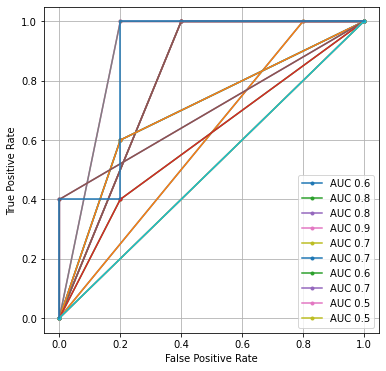

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

for i in x:

    real, pred = pd.Series(y), pd.Series(x > i)
 
    auc_r = roc_auc_score(real, pred)

    if auc_r > 0.5:
    
        lr_fpr, lr_tpr, _ = roc_curve(real, pred)

    else:
        lr_fpr, lr_tpr, _ = roc_curve(real.replace([0,1],[1,0]), pred)
        auc_r = roc_auc_score(real.replace([0,1],[1,0]), pred)

    #sns.set(style='white')
    
    plt.plot(lr_fpr, lr_tpr, marker='.', label = 'AUC ' + str(round(auc_r, 3)))
    plt.plot(lr_fpr, lr_tpr, marker='.')
    #plt.plot(lr_fpr, lr_fpr, linestyle='--') """

plt.legend(loc = 4)

fpr, tpr, _ = roc_curve(y,x)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
plt.grid()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [14]:
y-x

array([-1, -3, -3, -4, -4, -4, -5, -8, -8, -8])

## Splines

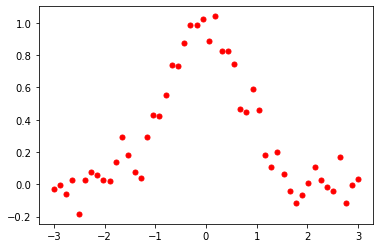

In [31]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
plt.plot(x, y, 'ro', ms=5)

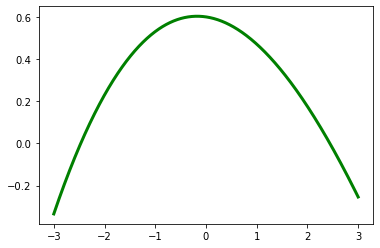

In [32]:
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

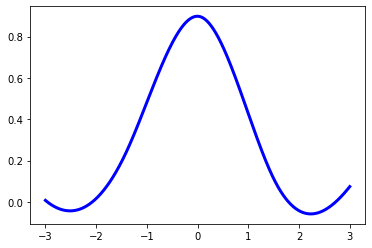

In [33]:
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

In [124]:
#np.random.choice(a, 100)

import numpy as np
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
b1 = np.array([-0.4, 0.4, 0.4, 0.6, 1. , 1. , 1. , 1. ])
b2 = np.array([-1, 0.4, 0.4, 0.6, 0.9, 0.9, 0.9, 0.9])
lowess(b1, a)

np.trapz(b, a)

0.88

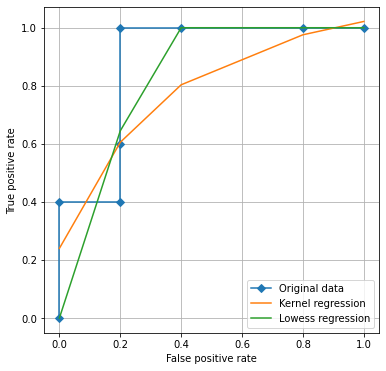

In [123]:
from statsmodels.nonparametric.kernel_regression import KernelReg

a = np.array([0 , 0. , 0.2, 0.2, 0.2, 0.4, 0.8, 1. ])

b = np.array([0 , 0.4, 0.4, 0.6, 1. , 1. , 1. , 1. ])

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))
plt.plot(a,b, marker='D', label = 'Original data')

kr = KernelReg(b,a,'c')
#plt.plot(x, y, '+')
y_pred, y_std = kr.fit(a)

plt.plot(a, y_pred, label = 'Kernel regression')
plt.plot(lowess(b1, a)[:,0], lowess(b1, a)[:,1], label = 'Lowess regression')

plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.grid()
plt.show()

In [200]:
a = 0; b = 1; n = 100

S = []

for i in range(1, len(tpr) + 1):
#for i in range(0, len(tpr)):
    if i < len(tpr):
        try:
            d_x = (tpr[i] - tpr[i-1])/(len(tpr) + 1)
            x_i = a + i*d_x
            s = d_x * sin(x_i)
        except:
            s = 1
    print(d_x)
    print(x_i)
   

    S = S + [s]

sum(S)



0.044444444444444446
0.044444444444444446
0.0
0.0
0.022222222222222216
0.06666666666666665
0.044444444444444446
0.17777777777777778
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


8

In [4]:
#tpr = tpr[::-1]
#fpr = fpr[::-1]

#tpr
#j
import numpy as np
fpr = np.array([0, 0, 0.2, 0.2, 0.2, 0.4, 0.8, 1])
tpr = np.array([0, 0.4, 0.4, 0.6, 1, 1, 1, 1])

print(np.trapz(tpr, fpr))

0.88


In [187]:
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")


In [206]:
riemann_sum(np.exp, 0,1,len(tpr),'left')

1.6131259778856117